# DATA PREPARATION

### Importing Libraries

In [3]:
import pandas as pd

### Ingesting Datasets

Loading the dataset is the first step in data preparation. It bring the data into a structured format for further analysis and manipulation.

I am ingesting two datasets, namely **TMQ20** and **Trips per Quarter**, taken from the [data.cso.ie](https://data.cso.ie) site. 

- The **TMQ20** dataset contains the following columns:
  - Area of Residence
  - Reason for Journey
  - Average Length of Stay
  - Expenditure
  - Percentage of Trips
  - Year

- The **Trips per Quarter** dataset contains the following columns:
  - Year
  - Period
  - All Trips
  - Irish Residents Trips Overseas
  - Trips to Ireland
  - Great Britain
  - Other Europe
  - USA and Canada
  - Other Areas

In [6]:
main_data = pd.read_csv(r"D:\CCT Learnings\Git\CCT_CA1\Dataset\TMQ20.csv")

In [7]:
trips_quarter = pd.read_csv(r"D:\CCT Learnings\Git\CCT_CA1\Dataset\Trips per Quarter.csv")

### Display the first 5 rows of the Datasets

It provides a quick snapshot of the dataset's structure, including column names and the type of data stored in each column.

In [10]:
main_data.head()

,Area of Residence,Reason for Journey,Quarter,Statistic Label,UNIT,VALUE
0,All Countries,All reasons for journey,2012Q1,Average Length of Stay by Overseas Travellers ...,Nights,6.8
1,All Countries,All reasons for journey,2012Q1,Expenditure by Overseas Travellers in Ireland ...,Euro Million,483.0
2,All Countries,All reasons for journey,2012Q1,"Overseas Trips to Ireland by Non-Residents, wi...",%,100.0
3,All Countries,All reasons for journey,2012Q2,Average Length of Stay by Overseas Travellers ...,Nights,7.0
4,All Countries,All reasons for journey,2012Q2,Expenditure by Overseas Travellers in Ireland ...,Euro Million,816.0


In [11]:
trips_quarter.head()

,Year,Period,All Trips,Irish Residents Trips Overseas,Trips to Ireland,Great Britain,Othe Europe,USA and Canada,Other Areas
0,2012.0,Quarter 1,"23,99,900","12,34,800","11,65,100","5,62,400","3,92,800","1,44,700","65,200"
1,2012.0,Quarter 2,"35,44,700","17,27,500","18,17,300","7,35,200","6,72,400","3,05,700","1,04,000"
2,2012.0,Quarter 3,"40,99,900","20,03,200","20,96,700","8,30,200","7,76,800","3,65,200","1,24,500"
3,2012.0,Quarter 4,"27,98,400","13,60,400","14,38,000","6,46,400","5,05,400","2,01,300","85,000"
4,2012.0,Total,"1,28,42,900","63,25,800","65,17,200","27,74,200","23,47,400","10,16,900","3,78,600"


### Summary information about the datasets

Summary of the dataset, including columns, data types, missing values, and memory usage.

In [14]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area of Residence   3840 non-null   object 
 1   Reason for Journey  3840 non-null   object 
 2   Quarter             3840 non-null   object 
 3   Statistic Label     3840 non-null   object 
 4   UNIT                3840 non-null   object 
 5   VALUE               3840 non-null   float64
dtypes: float64(1), object(5)
memory usage: 180.1+ KB


In [15]:
trips_quarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            40 non-null     float64
 1   Period                          40 non-null     object 
 2   All Trips                       40 non-null     object 
 3   Irish Residents Trips Overseas  40 non-null     object 
 4   Trips to Ireland                40 non-null     object 
 5   Great Britain                   40 non-null     object 
 6   Othe Europe                     40 non-null     object 
 7   USA and Canada                  40 non-null     object 
 8   Other Areas                     40 non-null     object 
dtypes: float64(1), object(8)
memory usage: 3.0+ KB


### Descriptive statistics of the dataset

Summary statistics (e.g., count, mean, std, min, max) for numerical columns in the dataset.

In [18]:
main_data.describe()

,VALUE
count,3840.000000
mean,46.485911
std,128.569965
min,0.500000
25%,6.400000
50%,10.500000
75%,33.725000
max,1832.000000


In [19]:
trips_quarter.describe()

,Year
count,40.000000
mean,2015.500000
std,2.320477
min,2012.000000
25%,2013.750000
50%,2015.500000
75%,2017.250000
max,2019.000000


### Data Manipulation and Feature Engineering [TMQ20] dataset

The **TMQ20** dataset contains a column labeled `Statistic Label`, which comprises three distinct values:  
1. **'Average Length of Stay by Overseas Travellers to Ireland'**,  
2. **'Expenditure by Overseas Travellers in Ireland (excluding fares)'**, and  
3. **'Overseas Trips to Ireland by Non-Residents, with at least one overnight in Ireland'**.  

To enhance clarity and simplify the dataset for analysis, these values will be pivoted into separate columns. Each unique value in the `Statistic Label` column will be transformed into an individual column, with their corresponding data points mapped accordingly and dropping `UNIT` column. The new columns will be renamed for simplicity and ease of interpretation.

In [22]:
main_data = main_data.drop(columns=['UNIT'], axis=1)

In [23]:
main_data_pivot = main_data.pivot(index=['Area of Residence', 'Reason for Journey', 'Quarter'], 
                                          columns='Statistic Label', 
                                          values='VALUE',).reset_index()

In [24]:
main_data_pivot.rename(columns={"Average Length of Stay by Overseas Travellers to Ireland": "Avg Length of Stay",
                               "Expenditure by Overseas Travellers in Ireland (excluding fares)": "Expenditure",
                               "Overseas Trips to Ireland by Non-Residents, with at least one overnight in Ireland":"Overseas Trip Percentage"}, inplace=True)

In [25]:
main_data_pivot.columns.name = None

In [26]:
main_data_pivot['Year'] = main_data_pivot['Quarter'].str[:4]
main_data_pivot['Quarter'] = main_data_pivot['Quarter'].str[-1]

In [27]:
reindex = ['Year', 'Quarter', 'Area of Residence', 'Reason for Journey', 'Avg Length of Stay', 'Expenditure', 'Overseas Trip Percentage']

main_data_pivot = main_data_pivot.reindex(columns= reindex)

In [28]:
main_data_pivot["Year"] = main_data_pivot["Year"].astype(int)
main_data_pivot["Quarter"] = main_data_pivot["Quarter"].astype(int)

### Display the first 5 rows of the Pivoted Dataset

In [30]:
main_data_pivot.head()

,Year,Quarter,Area of Residence,Reason for Journey,Avg Length of Stay,Expenditure,Overseas Trip Percentage
0,2012,1,All Countries,All reasons for journey,6.8,483.0,100.0
1,2012,2,All Countries,All reasons for journey,7.0,816.0,100.0
2,2012,3,All Countries,All reasons for journey,8.1,994.0,100.0
3,2012,4,All Countries,All reasons for journey,7.2,622.0,100.0
4,2013,1,All Countries,All reasons for journey,6.7,541.0,100.0


### Descriptive statistics of the pivoted dataset

In [32]:
main_data_pivot.describe()

,Year,Quarter,Avg Length of Stay,Expenditure,Overseas Trip Percentage
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,2015.500000,2.500000,9.336641,105.121875,24.999219
std,2.292183,1.118471,6.216477,208.178900,30.909652
min,2012.000000,1.000000,0.500000,1.000000,1.000000
25%,2013.750000,1.750000,5.900000,12.000000,6.000000
50%,2015.500000,2.500000,7.700000,37.000000,11.000000
75%,2017.250000,3.250000,10.225000,106.250000,27.000000
max,2019.000000,4.000000,49.400000,1832.000000,100.000000


In [33]:
main_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1280 non-null   int32  
 1   Quarter                   1280 non-null   int32  
 2   Area of Residence         1280 non-null   object 
 3   Reason for Journey        1280 non-null   object 
 4   Avg Length of Stay        1280 non-null   float64
 5   Expenditure               1280 non-null   float64
 6   Overseas Trip Percentage  1280 non-null   float64
dtypes: float64(3), int32(2), object(2)
memory usage: 60.1+ KB


### Data Manipulation and Feature Engineering [Trips per Quarter] dataset

- In the **Trips per Quarter** dataset, the quarter number (1,2,3,4) will be extracted from the `Period` column into a new `Quarter` column, excluding the **Total** value and retaining only **Quarter1** to **Quarter4**.
- The values in the `Year` column is of type String. Hence, Converting `Year` to integer for consistency.
- The `Trips to Ireland` column will be converted from string format (with commas) to numeric format, and only the `Year`, `Period`, `Quarter` and `Trips to Ireland` columns will be kept to convert Overseas Trip Percentage column to actual numbers.

In [36]:
trips_quarter.drop(columns=['All Trips', 'Irish Residents Trips Overseas',
                              'Great Britain', 'Othe Europe', 'USA and Canada',
                              'Other Areas'], axis=1, inplace=True)

In [37]:
trips_quarter = trips_quarter[trips_quarter["Period"].str.contains("Quarter", na=False)].copy().reset_index()

In [38]:
trips_quarter.drop(columns=['index'], axis=1, inplace=True)

In [39]:
trips_quarter["Year"] = trips_quarter["Year"].astype(int)

In [40]:
trips_quarter["Quarter"] = trips_quarter["Period"].str.extract(r'(\d)').astype(int)

In [41]:
trips_quarter.drop(columns=['Period'], axis=1, inplace=True)

In [42]:
reindex_2 = ['Year', 'Quarter', 'Trips to Ireland']
trips_quarter=trips_quarter.reindex(columns=reindex_2)

In [43]:
trips_quarter['Trips to Ireland'] = trips_quarter['Trips to Ireland'].str.replace(",", "").astype(int)

In [44]:
trips_quarter.head()

,Year,Quarter,Trips to Ireland
0,2012,1,1165100
1,2012,2,1817300
2,2012,3,2096700
3,2012,4,1438000
4,2013,1,1251700


### Descriptive statistics [Trips per Quarter] dataset

In [46]:
trips_quarter.describe()

,Year,Quarter,Trips to Ireland
count,32.000000,32.000000,3.200000e+01
mean,2015.500000,2.500000,2.209075e+06
std,2.327951,1.135924,6.079913e+05
min,2012.000000,1.000000,1.165100e+06
25%,2013.750000,1.750000,1.793250e+06
50%,2015.500000,2.500000,2.132900e+06
75%,2017.250000,3.250000,2.641525e+06
max,2019.000000,4.000000,3.334400e+06


In [47]:
trips_quarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              32 non-null     int32
 1   Quarter           32 non-null     int32
 2   Trips to Ireland  32 non-null     int32
dtypes: int32(3)
memory usage: 516.0 bytes


### Merging two datasets

In [49]:
merged_data = pd.merge(main_data_pivot, trips_quarter, on=["Year", "Quarter"], how="inner")

In [50]:
merged_data.head()

,Year,Quarter,Area of Residence,Reason for Journey,Avg Length of Stay,Expenditure,Overseas Trip Percentage,Trips to Ireland
0,2012,1,All Countries,All reasons for journey,6.8,483.0,100.0,1165100
1,2012,2,All Countries,All reasons for journey,7.0,816.0,100.0,1817300
2,2012,3,All Countries,All reasons for journey,8.1,994.0,100.0,2096700
3,2012,4,All Countries,All reasons for journey,7.2,622.0,100.0,1438000
4,2013,1,All Countries,All reasons for journey,6.7,541.0,100.0,1251700


### Descriptive statistics Merged dataset

In [52]:
merged_data.describe()

,Year,Quarter,Avg Length of Stay,Expenditure,Overseas Trip Percentage,Trips to Ireland
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03
mean,2015.500000,2.500000,9.336641,105.121875,24.999219,2.209075e+06
std,2.292183,1.118471,6.216477,208.178900,30.909652,5.986499e+05
min,2012.000000,1.000000,0.500000,1.000000,1.000000,1.165100e+06
25%,2013.750000,1.750000,5.900000,12.000000,6.000000,1.793250e+06
50%,2015.500000,2.500000,7.700000,37.000000,11.000000,2.132900e+06
75%,2017.250000,3.250000,10.225000,106.250000,27.000000,2.641525e+06
max,2019.000000,4.000000,49.400000,1832.000000,100.000000,3.334400e+06


In [53]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1280 non-null   int32  
 1   Quarter                   1280 non-null   int32  
 2   Area of Residence         1280 non-null   object 
 3   Reason for Journey        1280 non-null   object 
 4   Avg Length of Stay        1280 non-null   float64
 5   Expenditure               1280 non-null   float64
 6   Overseas Trip Percentage  1280 non-null   float64
 7   Trips to Ireland          1280 non-null   int32  
dtypes: float64(3), int32(3), object(2)
memory usage: 65.1+ KB


### Feature Engineering on the Merged dataset

In the merged dataset, a new column named `Number of Trips` will be created by converting the percentage values from the `Overseas Trips Percentage` column into actual numbers. This calculation will be based on the corresponding values in the `Trips to Ireland` column.
                                                    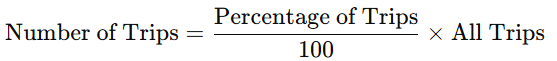

In [56]:
merged_data["Number of Trips"] = (merged_data["Overseas Trip Percentage"] / 100) * merged_data["Trips to Ireland"]

In [57]:
merged_data = merged_data.rename(columns={'Trips to Ireland':'Total Trips'})

In [58]:
merged_data.head()

,Year,Quarter,Area of Residence,Reason for Journey,Avg Length of Stay,Expenditure,Overseas Trip Percentage,Total Trips,Number of Trips
0,2012,1,All Countries,All reasons for journey,6.8,483.0,100.0,1165100,1165100.0
1,2012,2,All Countries,All reasons for journey,7.0,816.0,100.0,1817300,1817300.0
2,2012,3,All Countries,All reasons for journey,8.1,994.0,100.0,2096700,2096700.0
3,2012,4,All Countries,All reasons for journey,7.2,622.0,100.0,1438000,1438000.0
4,2013,1,All Countries,All reasons for journey,6.7,541.0,100.0,1251700,1251700.0


### Adding a new column 'Season'

A new column named `Season` will be created in the dataset, mapping the quarter values as follows: Q1 to Winter, Q2 to Spring, Q3 to Summer, and Q4 to Autumn for seasonal analysis

In [61]:
season_map = {1 : 'Winter', 2 : 'Spring', 3 : 'Summer', 4 : 'Autumn'}

merged_data['Season'] = merged_data['Quarter'].map(season_map)

In [62]:
merged_data.head()

,Year,Quarter,Area of Residence,Reason for Journey,Avg Length of Stay,Expenditure,Overseas Trip Percentage,Total Trips,Number of Trips,Season
0,2012,1,All Countries,All reasons for journey,6.8,483.0,100.0,1165100,1165100.0,Winter
1,2012,2,All Countries,All reasons for journey,7.0,816.0,100.0,1817300,1817300.0,Spring
2,2012,3,All Countries,All reasons for journey,8.1,994.0,100.0,2096700,2096700.0,Summer
3,2012,4,All Countries,All reasons for journey,7.2,622.0,100.0,1438000,1438000.0,Autumn
4,2013,1,All Countries,All reasons for journey,6.7,541.0,100.0,1251700,1251700.0,Winter
